In [1]:
# -*- coding: utf8

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Para evitar a confusão da aula passada, colocando alguns defaults!
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.ion()

plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Aula 07 - Teorema Central do Limite

## Objetivos

1. Revisar conceitos de média de variânça
1. Entender a ideia por trás do TCL

## Resultados Esperados

1. Simular médias de qualquer distribuição
1. Mostrar como a distribuição de média segue uma normal

## Introdução

Uma razão pela qual a distribuição normal é tão útil é o teorema central do limite, que diz (em essência) que uma variável aleatória definida como a média (ou soma) de um grande número de variáveis aleatórias independentes e identicamente distribuídas é aproximadamente distribuída normalmente. Em outras palavras, a distribuição amostral de médias segue uma normal.

Em detalhes, se $X_1, ..., X_n$ são variáveis aleatórias. Em particular, todas as VAs foram amostradas de uma mesma população com média $\mu$ (finita), desvio padrão $\sigma$ (finito). Além do mais, a geração de cada VA é independente da outra, sendo toas identicamente distribuídas. Quando $n$ é grande, então

$$\frac{1}{n}(X_1 + \cdots + X_n)$$

é aproximadamente distribuído por uma Normal com média $\mu$ e desvio padrão $\sigma/\sqrt{n}$. De forma equivalente (mas muitas vezes mais útil), 

$$Z = \frac{(X_1 + \cdots + X_n) - \mu }{\sigma / \sqrt{n}}$$

é aproximadamente uma normal com média 0 e desvio padrão 1.

$$Z \sim Normal(0, 1).$$

### Como transformar VAs?

Lemebre-se da aula passada que sabemos estimar:

$$\bar{x} \approx \mu$$

e 

$$s^2 \approx \sigma$$

Além do mais, sabemos que a variância do estimador da média é:

$$Var(\hat{\mu}) = \frac{\sigma^2}{n}$$

Assim:

\begin{align}
\bar{X} \sim Normal(\mu, \frac{\sigma^2}{n}) \\
\bar{X}- \mu \sim Normal(0, \frac{\sigma^2}{n}) \\
\frac{\bar{X}- \mu}{\sigma / \sqrt{n}} \sim Normal(0, 1) \\
\end{align}



## Exemplo das Moedas

Considere o caso de uma moeda sendo jogada para cima. Agora, escolhe um número `n` (tamanho da amostra), e gere amostras da mesma. Ou seja, jogue uma moeda para cima `n` vezes. Por fim, some quantas vezes a moeda cai em `cara` (ou `coroa`). Isto é uma soma para uma amostra de tamanho `n`.

O processo de geração destes dados é bem capturado por uma distribuição Binomial. Variáveis aleatórias binomiais, que possuem dois parâmetros $n$ e $p$. A distribuição binomial é útil para contar o número de sucessos $n$ dada uma probabilidade $p$. Por exemplo, quantas vezes ($n$) uma moeda ($p$) gera um o valor cara. Formalmente, uma variável aleatória Binomial($n, p$) é simplesmente a soma de $n$ variáveis aleatórias independentes de Bernoulli($p$), cada uma delas igual a $1$ com probabilidade $p$ e $0$ com probabilidade $1 - p$.

Ao gerar um valor de uma Binomial estamos falando "Jogue uma moeda para cima n vezes e conte quantas caras!". No caso abaixo, jogue uma moeda para cima 5 vezes e conte quantas caras!

In [4]:
num_caras = np.random.binomial(5, 0.5)
num_caras

3

Vamos repetir o processo várias! Jogue uma moeda para cima 5 vezes, pare, respire, depois jogue mais 5. Por aí vai. Note que temos a contagem para cada experimento de tamanho 5.

In [5]:
np.random.binomial(5, 0.5, size=10)

array([3, 3, 4, 3, 2, 2, 2, 2, 1, 2])

Agora, vamos ver o gráfico de tal experimento!

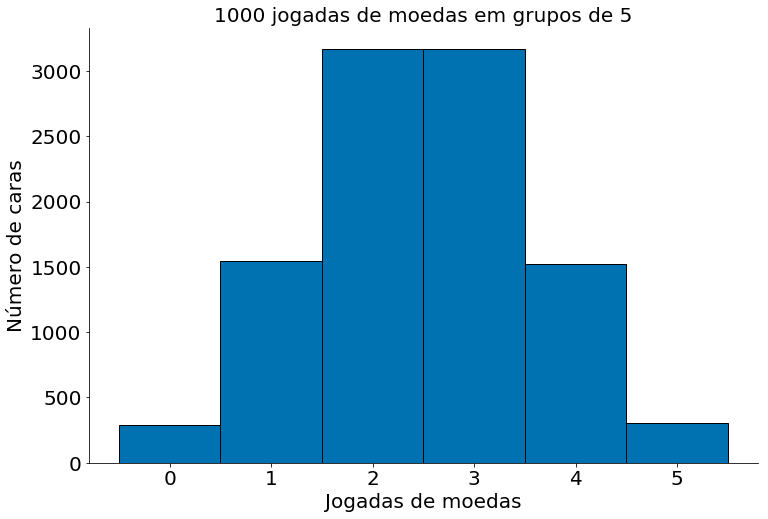

In [6]:
num_caras_a_cada_5 = np.random.binomial(5, 0.5, size=10000)
plt.hist(num_caras_a_cada_5, bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='k')
plt.xlabel('Jogadas de moedas')
plt.ylabel('Número de caras')
plt.title('1000 jogadas de moedas em grupos de 5')
despine()

Mesma coisa com 10 moedas

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5]


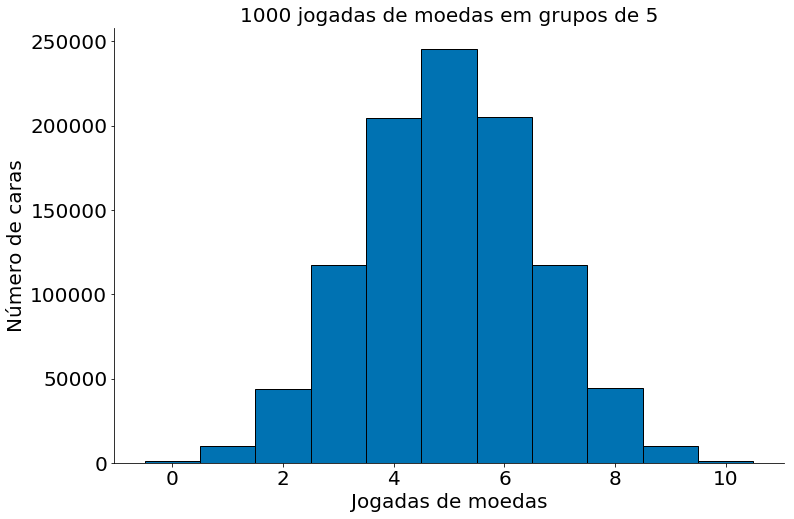

In [7]:
num_caras_a_cada_5 = np.random.binomial(10, 0.5, size=1000000)
ticks = np.linspace(-0.5, 10.5, num=12)
print(ticks)
plt.hist(num_caras_a_cada_5, bins=ticks, edgecolor='k')
plt.xlabel('Jogadas de moedas')
plt.ylabel('Número de caras')
plt.title('1000 jogadas de moedas em grupos de 5')
despine()

Lembrando da sua aula de probabilidade, uma população que segue uma variável Binomial($n, p$) tem média $\mu = np$ e desvio padrão $\sigma = \sqrt{np(1 - p)}$. Se plotarmos ambos, você pode facilmente ver a semelhança. Obseve o plot abaixo da PDF com os parâmetros que listamos (média, desvio padrão).

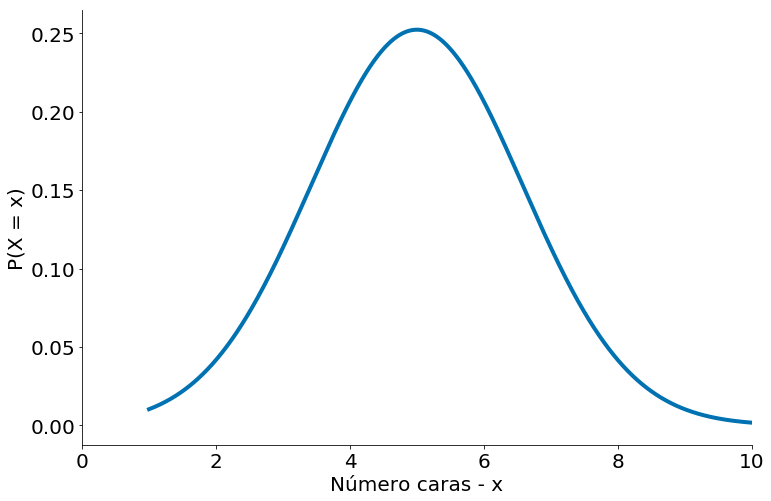

In [8]:
import scipy.stats as ss

mean = 10 * 0.5
std = np.sqrt(10 * 0.5 *(1 - 0.5))
x = np.linspace(1, 11, 1000)
y = ss.distributions.norm.pdf(loc=mean, scale=std, x=x)
plt.xlim(0, 10)
plt.plot(x, y)
plt.xlabel('Número caras - x')
plt.ylabel('P(X = x)')
despine()

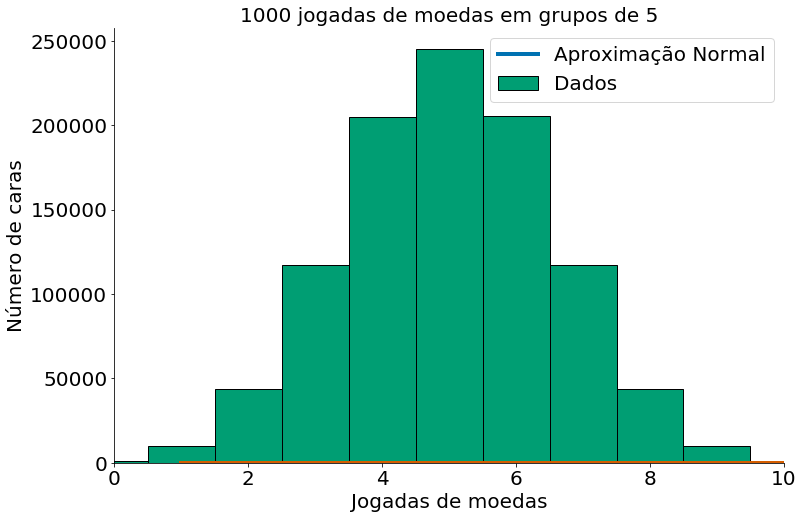

In [9]:
mean = 10 * 0.5
std = np.sqrt(10 * 0.5 *(1 - 0.5))
x = np.linspace(1, 11, 1000)
y = ss.distributions.norm.pdf(loc=mean, scale=std, x=x)
plt.xlim(0, 10)
plt.plot(x, y, label='Aproximação Normal')

num_caras_a_cada_5 = np.random.binomial(10, 0.5, size=1000000)
ticks = np.linspace(-0.5, 10.5, num=12)
plt.hist(num_caras_a_cada_5, bins=ticks, edgecolor='k', label='Dados')
plt.plot(x, y)
plt.xlabel('Jogadas de moedas')
plt.ylabel('Número de caras')
plt.title('1000 jogadas de moedas em grupos de 5')
plt.legend()
despine()

## Exemplo com Dados Sintéticos de Matrículas


Para exemplificar com dados, considere o exemplo abaixo onde geramos uma distribuição sintética de 25 mil alunos da UFMG. A distribuição captura o número de matéria que um aluno se matrícula no ano. Note que diferente da moeda, que gera apenas cara ou cora, cada aluno pode se matricular entre [min, max] matérias. No exemplo, vamos suport que todo aluno precisa se matricular em pelo menos uma matéria `min=1` e pode ser matricular em no máximo 10 matérias `max=10`. Agora, vamos suport que cada número de matéria tem probabilidade $p_i$. Ou seja, a chance se matricular em uma matéria é $p_1$ e por aí vai.

Dados deste tipo são modelados por distribuições multinomiais. Generalizando a Binomial, uma Multinomial conta a quantidade de sucessos (matrículas) em cada $p_i$. A mesma é definida por $n > 0$, número de amostras ou matrículas, e $p_1, \ldots, p_k$ probabilidade de se matrícular em $i$ matérias. A pmf de uma multinomial é dada por:

$$P(X = x) = \frac{n!}{x_1!\cdots x_k!} p_1^{x_1} \cdots p_k^{x_k}$$

Inicialmente observe os valores de $p_i$.

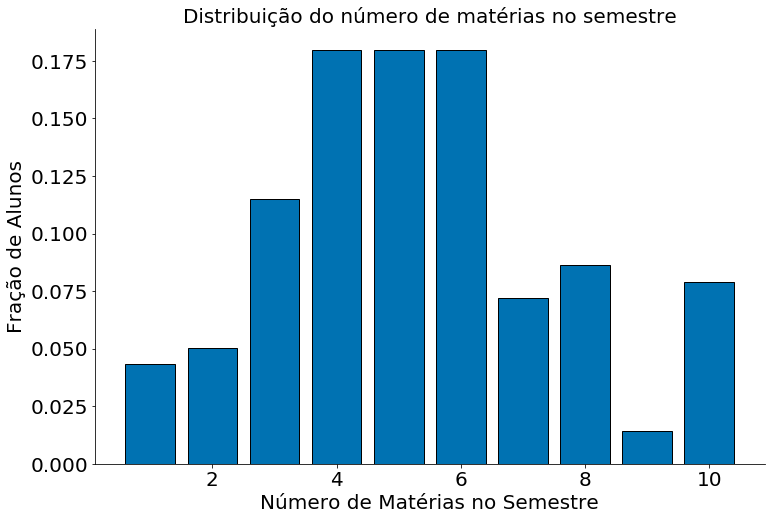

In [10]:
num_materias = np.arange(10) + 1
prob_materias = np.array([6, 7, 16, 25, 25, 25, 10, 12, 2, 11])
prob_materias = prob_materias / prob_materias.sum()
plt.bar(num_materias, prob_materias, edgecolor='k')
plt.xlabel('Número de Matérias no Semestre')
plt.ylabel('Fração de Alunos')
plt.title('Distribuição do número de matérias no semestre')
despine()

Agora vamos responder a pergunta: **Quantas matérias, em média, um aluno se matrícula?!**. Note que a nossa pergunta aqui é **em média!!**. Então, vamos considerar que temos 25 mil discente na ufmg. Para cada um destes alunos, vamos amostrar de $p_i$ o número de matérias que tal aluno está matrículado no atual semestre.

In [11]:
amostras = 25000
mats = np.arange(10) + 1
print(mats)

dados = []
for i in range(25000):
    n_mat = np.random.choice(mats, p=prob_materias)
    dados.append(n_mat)
dados = np.array(dados)
dados

[ 1  2  3  4  5  6  7  8  9 10]


array([4, 6, 2, ..., 4, 2, 2])

Agora vamos responder nossa pergunta. **Quantas matérias, em média, um aluno se matrícula?!**. Para tirar uma média precisamos de uma amostra. Vamos definir amostras de tamanho 100. Então, vamos amostrar 100 alunos, **com repetição**, dos nossos 25 mil alunos.

In [12]:
n_amostra = 100
soma = 0
for i in range(n_amostra):
    aluno = np.random.randint(0, len(dados))
    num_mat = dados[aluno]
    soma += num_mat
media = soma / n_amostra
print(media)

5.16


Vamos repetir o processo algumas vezes. Tipo, 10000 vezes.

In [13]:
n_amostra = 100
medias = []
for _ in range(10000):
    soma = 0
    for i in range(n_amostra):
        aluno = np.random.randint(0, len(dados))
        num_mat = dados[aluno]
        soma += num_mat
    media = soma / n_amostra
    medias.append(media)
medias = np.array(medias)

Agora vamos ver os resultados!

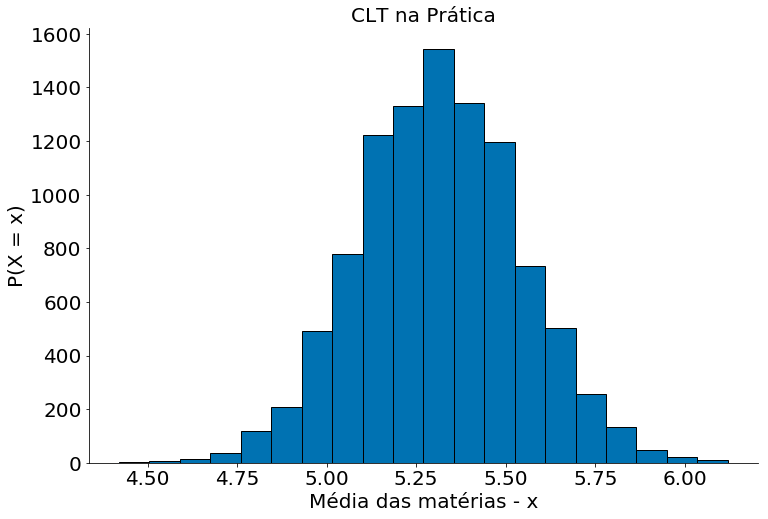

In [14]:
plt.hist(medias, bins=20, edgecolor='k')
plt.ylabel('P(X = x)')
plt.xlabel('Média das matérias - x')
plt.title('CLT na Prática')
despine()

Agora, vamos comparar com a nossa Normal, para isto podemos usar a média das médias e o desvio padrão das médias.

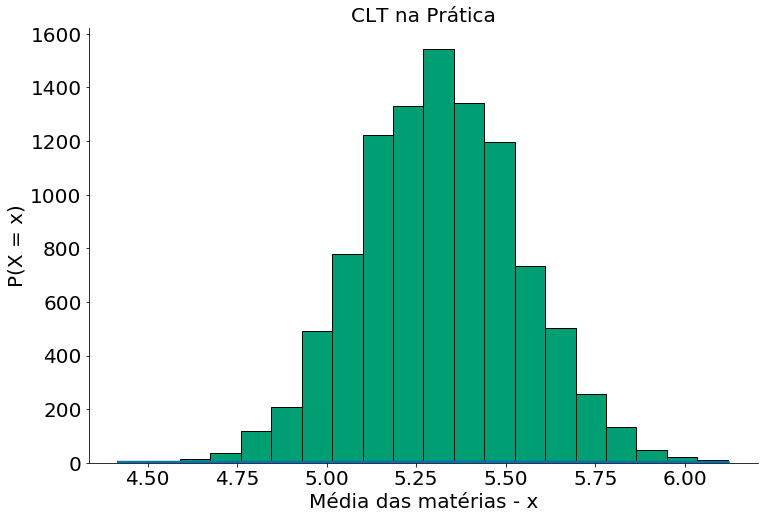

In [15]:
mean = np.mean(medias)
# ddof=1 faz dividir por n-1
std = np.std(medias, ddof=1)

# pegue 1000 números entre o minimo e o max
x = np.linspace(np.min(medias), np.max(medias), 1000)
y = ss.distributions.norm.pdf(loc=mean, scale=std, x=x)

plt.plot(x, y, label='Aproximação Normal')

plt.hist(medias, bins=20, edgecolor='k')
plt.ylabel('P(X = x)')
plt.xlabel('Média das matérias - x')
plt.title('CLT na Prática')
despine()

## Com Dados

In [16]:
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/08aula-TCL/nba_salaries.csv')
df.head()

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479


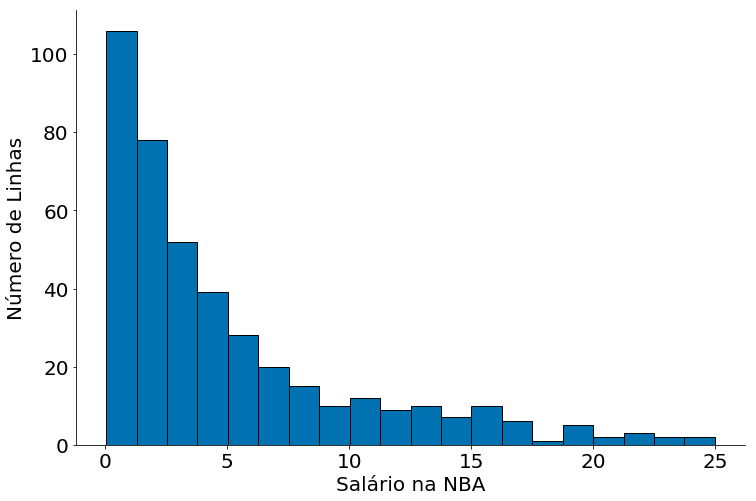

In [17]:
df['SALARY'].sort_values().plot.hist(bins=20, edgecolor='k')
plt.xlabel('Salário na NBA')
plt.ylabel('Número de Linhas')
despine()

In [18]:
N = 10000
data = df['SALARY']
medias = []
for i in range(N):
    mean = np.random.choice(data, 100).mean()
    medias.append(mean)

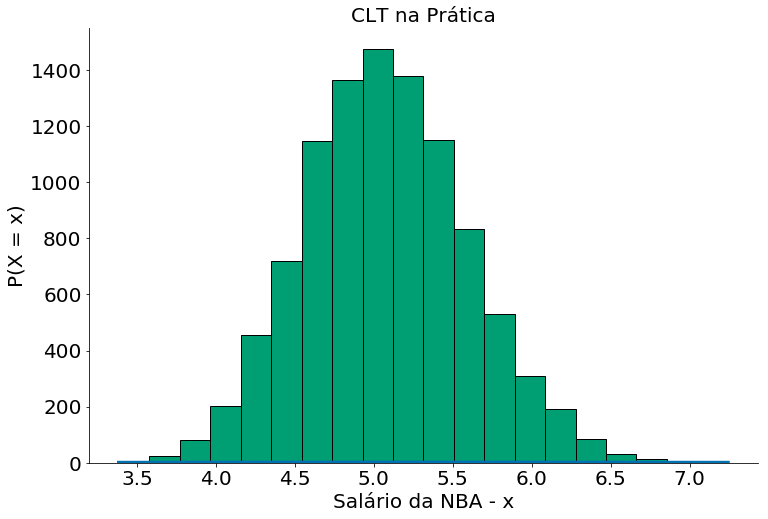

In [19]:
mean = np.mean(medias)
# ddof=1 faz dividir por n-1
std = np.std(medias, ddof=1)

# pegue 1000 números entre o minimo e o max
x = np.linspace(np.min(medias), np.max(medias), 1000)
y = ss.distributions.norm.pdf(loc=mean, scale=std, x=x)

plt.plot(x, y, label='Aproximação Normal')

plt.hist(medias, bins=20, edgecolor='k')
plt.ylabel('P(X = x)')
plt.xlabel('Salário da NBA - x')
plt.title('CLT na Prática')
despine()

## Condições para o TCL

Existem algumas condições para garantir que o TCL  seja válido.

1. Dados independentes e identicamente distribuídos.
1. Variância finita.
1. Pelo menos umas 30 amostras

Observe do wikipedia que uma distribuição Pareto(1) tem variância infinita. Quebramos nossa condição. Olhe que o plot abaixo não parece em nada com uma Normal.

https://en.wikipedia.org/wiki/Pareto_distribution

In [20]:
data = []
for _ in range(10000):
    m = np.random.pareto(1, size=100).mean()
    data.append(m)

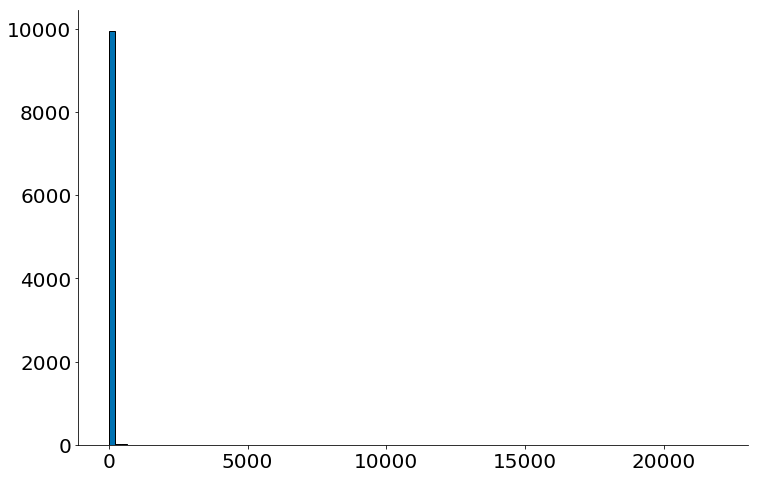

In [21]:
plt.hist(data, bins=100, edgecolor='k')
despine()

Podemos quebrar também com amostras muito pequenas, tipo na Beta(3, 2, size=2) abaixo.

Observe como é muito perto de uma Normal mas tem um certo viés para a direita.

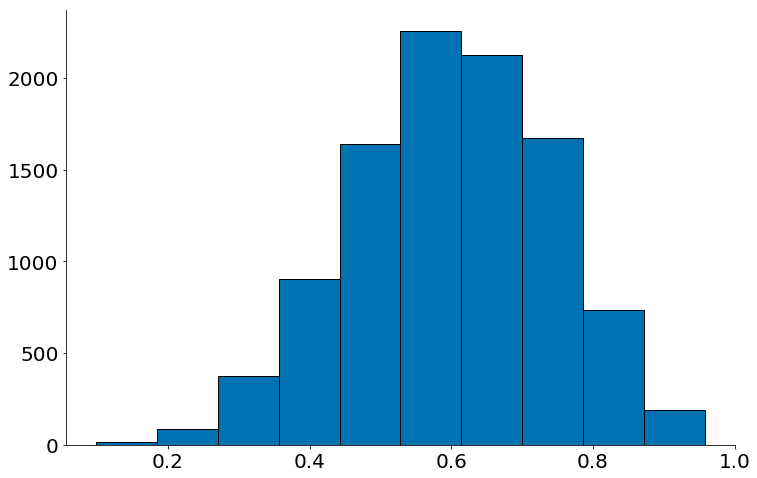

In [22]:
data = []
for _ in range(10000):
    m = np.random.beta(3, 2, size=2).mean()
    data.append(m)
plt.hist(data, edgecolor='k')
despine()

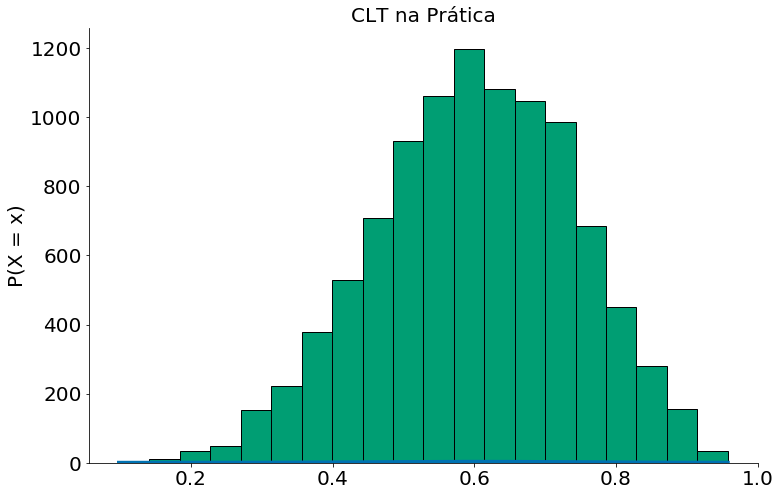

In [23]:
mean = np.mean(data)
# ddof=1 faz dividir por n-1
std = np.std(data, ddof=1)

# pegue 1000 números entre o minimo e o max
x = np.linspace(np.min(data), np.max(data), 1000)
y = ss.distributions.norm.pdf(loc=mean, scale=std, x=x)

plt.plot(x, y, label='Aproximação Normal')

plt.hist(data, bins=20, edgecolor='k')
plt.ylabel('P(X = x)')
plt.title('CLT na Prática')
despine()

## Para exploração futura

* Veja o material do Open-intro stats para uma definição mais formal do TCL.
* O Wikipedia também é um bom local.